In [1]:
%load_ext autoreload
%autoreload 2

# Inference

## 1. Loading the Training Set

We perform inference over the Test Set, so we load images indexes.

In [2]:
from settings import DATA, PRC
from model.dataset import FreiHANDSplit

split = FreiHANDSplit(
    n=DATA["n_data"],
    percentages=list(PRC.values())
)

idxs = split.test_idx
len(idxs)

1560

## 2. Loading Inference Model

We create inference image loader.

In [3]:
from model.inference import HandCollectionInference
from io_ import get_model_file

inference = HandCollectionInference(
    model_fp=get_model_file()
)
inference

INFO: Loading the model


HandPoseEstimationInference

We select images to plot.

In [4]:
from random import sample 
n = 8
selected_idxs = sample(population=idxs, k=n)

hands = [inference[idx] for idx in selected_idxs]

Raw image 00032362.jpg:


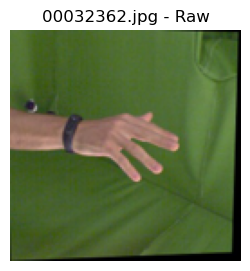

Raw image 00031105.jpg:


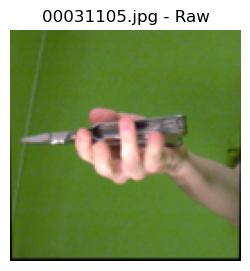

Raw image 00031857.jpg:


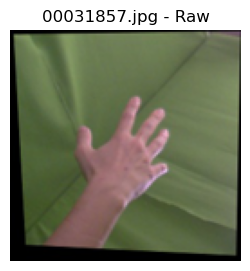

Raw image 00032247.jpg:


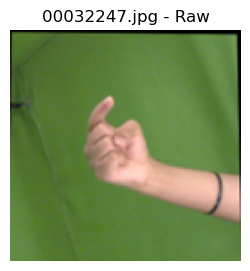

Raw image 00031504.jpg:


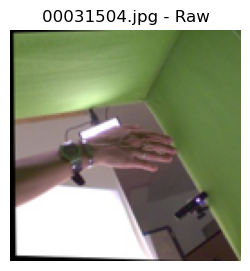

Raw image 00031194.jpg:


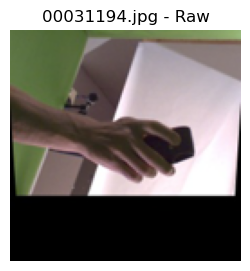

Raw image 00031383.jpg:


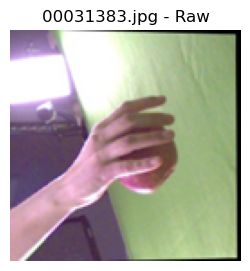

Raw image 00032234.jpg:


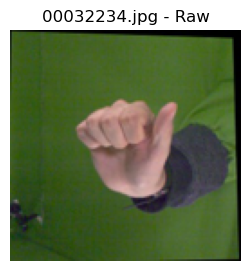

In [5]:
for hand in hands:
    print(f"Raw image {hand.idx}:")
    hand.plot_image()

## 3. Heatmaps 

Let's compare expected and predicted heatmaps.

Heatmaps for image 00032362.jpg:


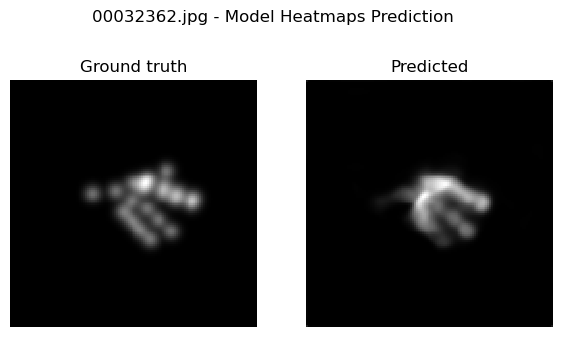

Heatmaps for image 00031105.jpg:


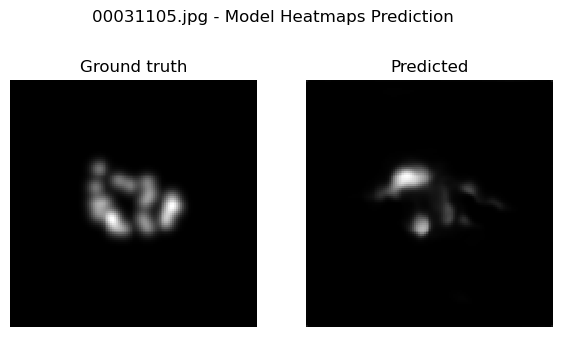

Heatmaps for image 00031857.jpg:


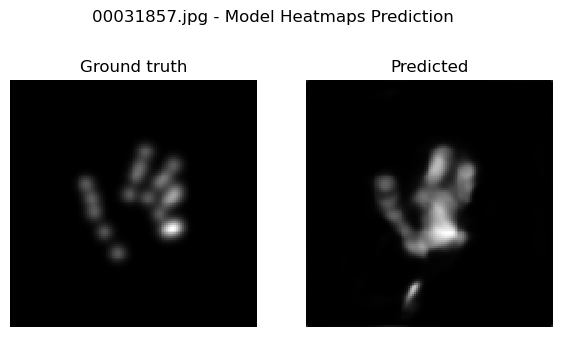

Heatmaps for image 00032247.jpg:


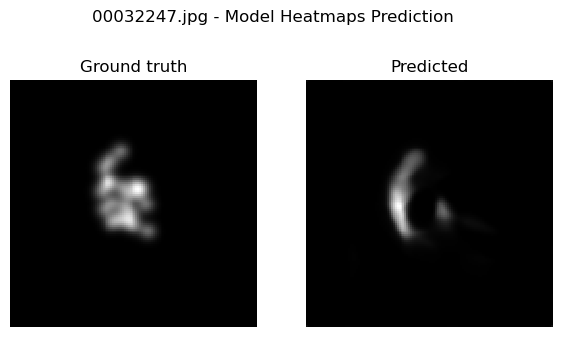

Heatmaps for image 00031504.jpg:


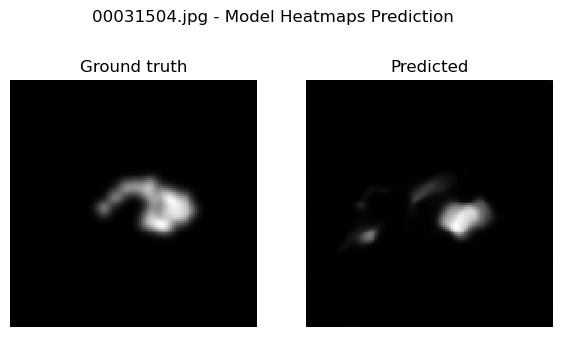

Heatmaps for image 00031194.jpg:


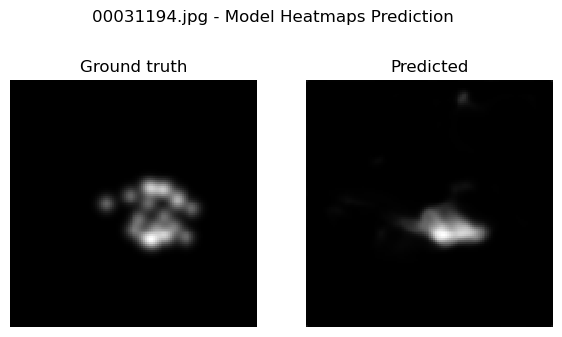

Heatmaps for image 00031383.jpg:


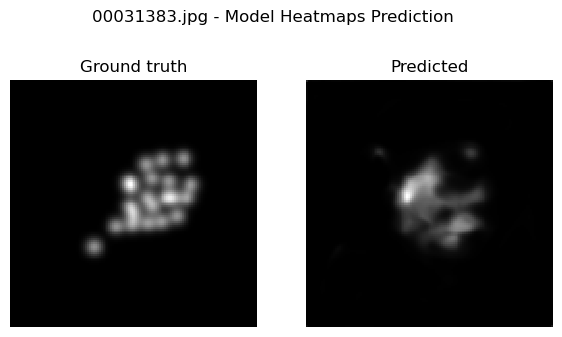

Heatmaps for image 00032234.jpg:


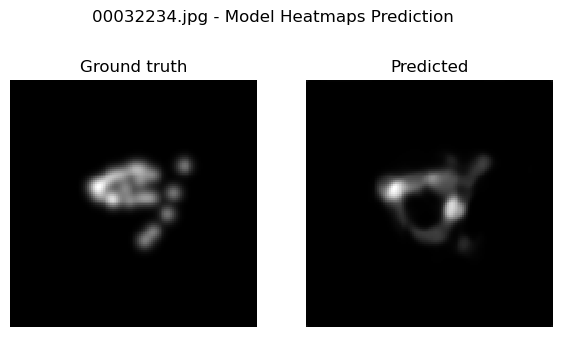

In [6]:
for hand in hands:
    print(f"Heatmaps for image {hand.idx}:")
    hand.plot_heatmaps_comparison()

## 4. Skeletons and Mean Pixel Error

We know convert heatmaps to keypoints and compute the mean pixel error.

Image 00032362.jpg - Mean pixel distance 5.640891525890372


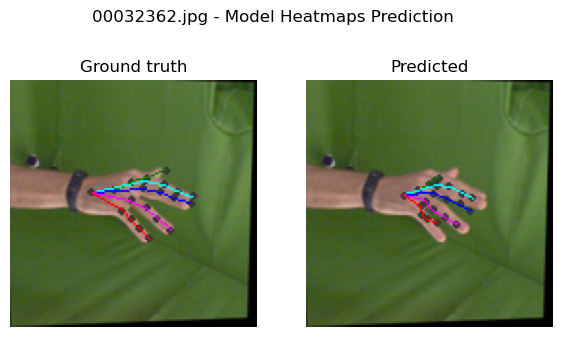

Image 00031105.jpg - Mean pixel distance 15.133736866970057


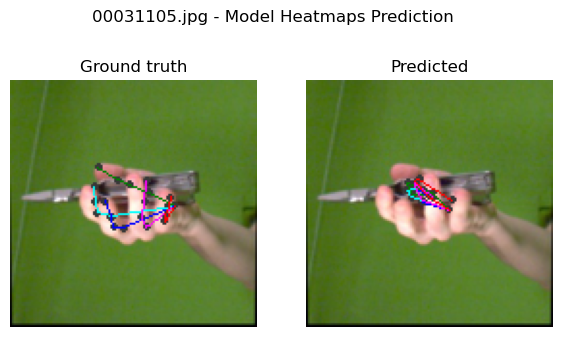

Image 00031857.jpg - Mean pixel distance 11.669863198237625


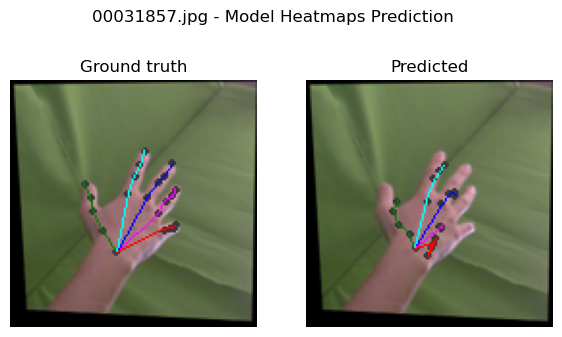

Image 00032247.jpg - Mean pixel distance 11.202411537117694


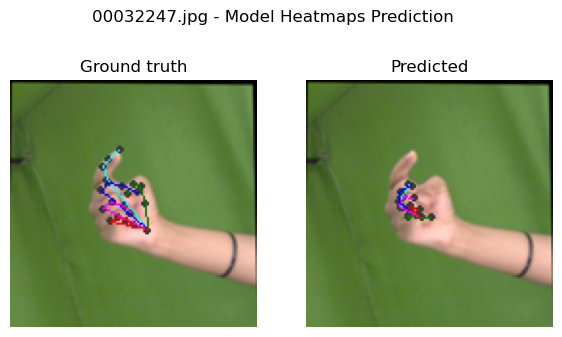

Image 00031504.jpg - Mean pixel distance 9.79111780165423


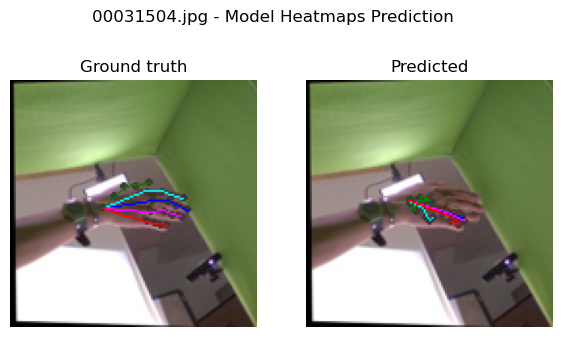

Image 00031194.jpg - Mean pixel distance 13.196440279065103


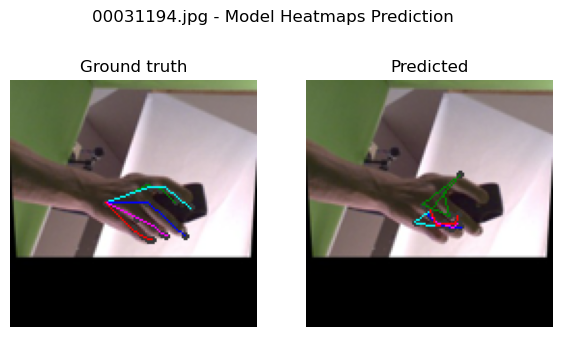

Image 00031383.jpg - Mean pixel distance 16.444662563463208


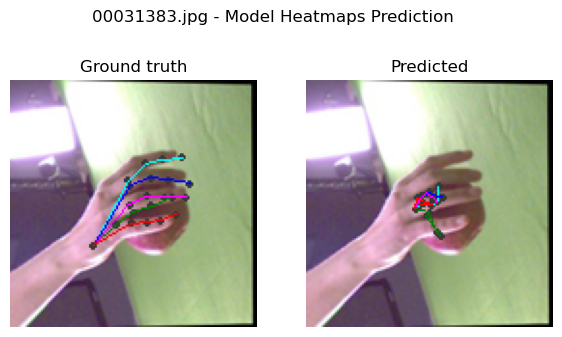

Image 00032234.jpg - Mean pixel distance 10.206646487461489


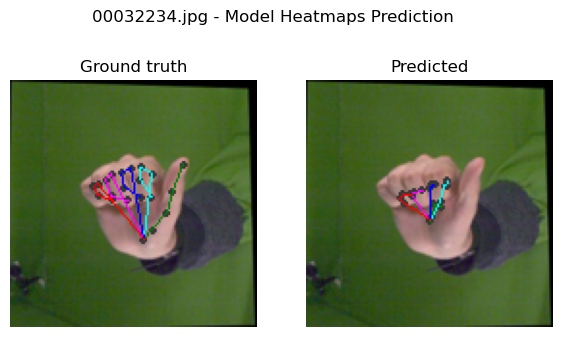

In [7]:
for hand in hands:
    print(f"Image {hand.idx} - Mean pixel distance {hand.mean_pixel_error}")
    hand.plot_skeletons_comparison()

## 5. Average Error

We compute all errors in order to compute mean error and see the best and worst predictions.

In [9]:
from os import path
from io_ import get_errors_file, read_json, store_json
from tqdm import tqdm

errors_fp = get_errors_file()

if not path.exists(path=errors_fp): 
    errors = {
        inference[idx].idx:
        inference[idx].mean_pixel_error
        for idx in tqdm(idxs)
    }
    store_json(path_=errors_fp, obj=errors)
else:
    errors = read_json(path_=errors_fp)

Let's compute the average error along all Test Dataset

In [15]:
import numpy as np

np.mean(errors)

13.105106539974258

In [18]:
best_10_idx = np.argmin(errors)

In [19]:
best_10_idx

718